In [36]:
import warnings

# To ignore all warnings
warnings.filterwarnings('ignore')


In [304]:
pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 2.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 3.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [347]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.tsa.api as smt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [335]:
# Load dataset
data = pd.read_csv('/Users/surajojha/Downloads/new project /Data/AutoInsurance.csv')

In [15]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [17]:
print("The number of rows:",data.shape[0])
print("The number of columns:",data.shape[1])

The number of rows: 9134
The number of columns: 24


In [18]:
data.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [24]:
numerical_cols = data.select_dtypes(include=["int64","float64"])

In [28]:
numerical_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [29]:
numerical_cols = numerical_cols.drop(["Number of Policies","Number of Open Complaints"],axis=1)

# Summary Statistics of Numerical features

In [30]:
numerical_cols.describe()


,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


In [31]:
#Checking Null values

data.isnull().sum()

Customer                         0
State                            0
CLV                              0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

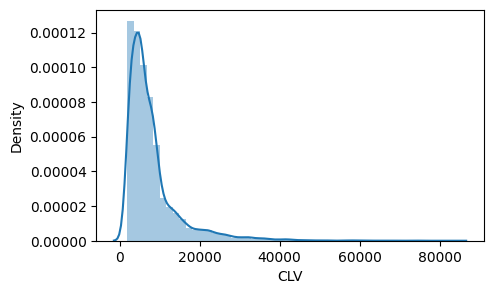

In [119]:
#Performed EDA to understand the relation of target variable
plt.figure(figsize=(5,3))
sns.distplot(data["CLV"])
plt.show()

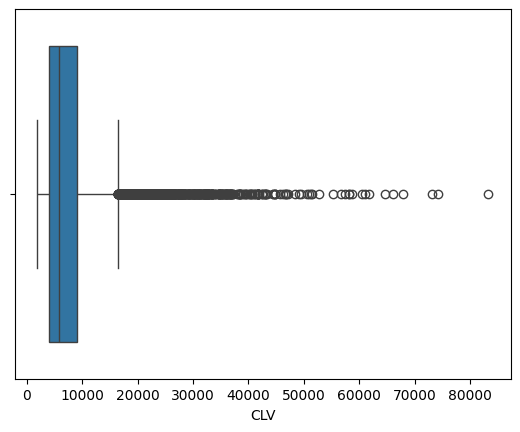

In [120]:

sns.boxplot(x = data["CLV"])
plt.show()

In [56]:
data["CLV"].skew()


np.float64(3.0322802599299847)

# Income
Univariate Analysis

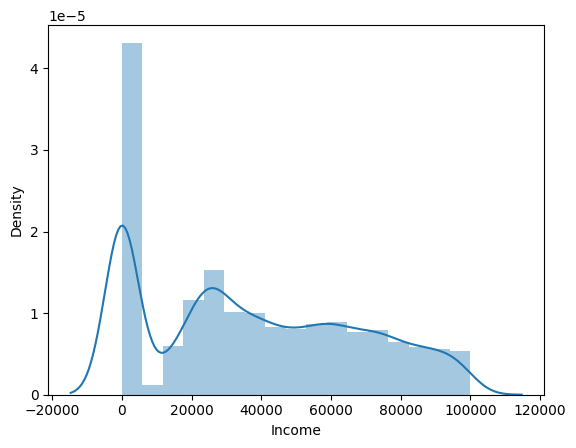

In [121]:
sns.distplot(data["Income"])
plt.show()

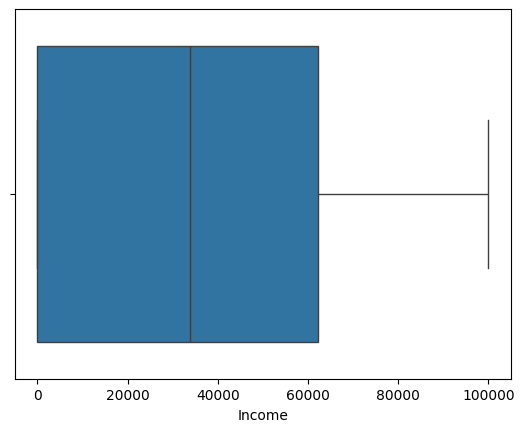

In [122]:
sns.boxplot(x = data["Income"])
plt.show()

# Bivariate Analysis

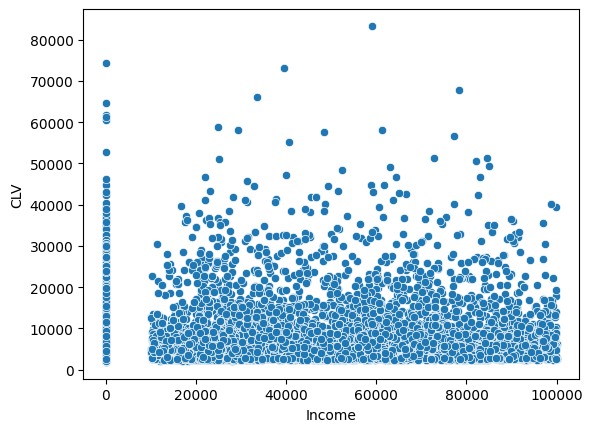

In [123]:
sns.scatterplot(x=data["Income"], y=data["CLV"])
plt.xlabel('Income')
plt.ylabel('CLV')
plt.show()

# There is no linear relationship between income and CLV

# Monthly Premium Auto

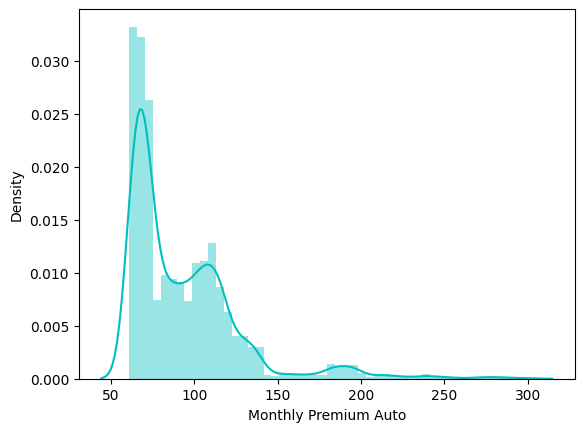

In [124]:
sns.distplot(data["Monthly Premium Auto"],color='c')
plt.show()

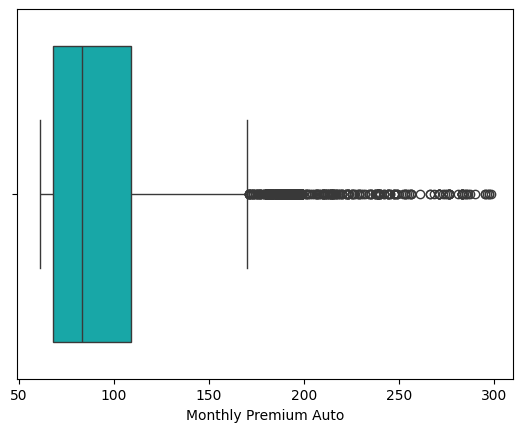

In [125]:
sns.boxplot(x = data["Monthly Premium Auto"],color='c')
plt.show()

# Bivariate Analysis

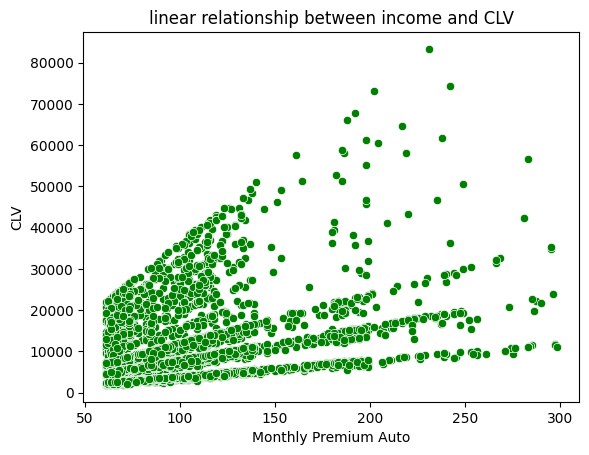

In [126]:
sns.scatterplot(x=data["Monthly Premium Auto"], y=data["CLV"], color='g')
plt.title('linear relationship between income and CLV')
plt.xlabel('Monthly Premium Auto')
plt.ylabel('CLV')
plt.show()

# Months Since Last Claim

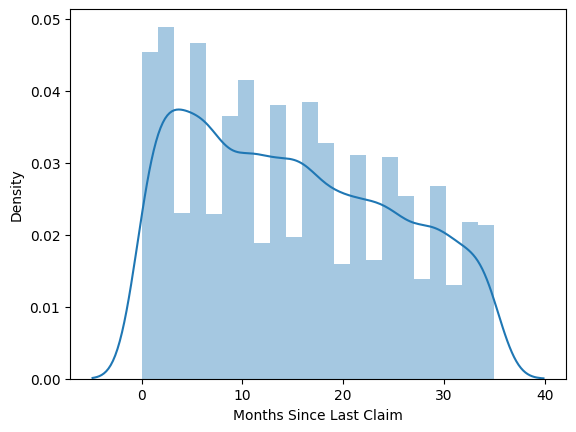

In [127]:
sns.distplot(data['Months Since Last Claim'])
plt.show()

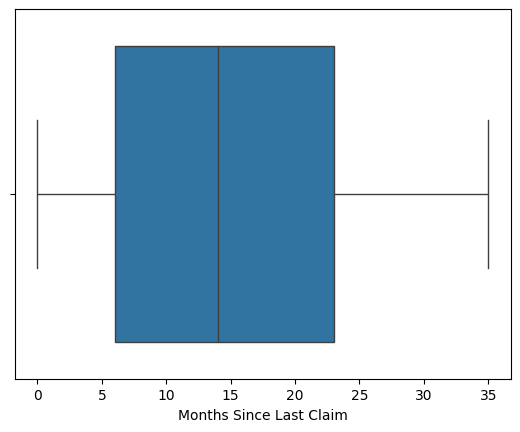

In [128]:
sns.boxplot(x = data["Months Since Last Claim"])
plt.show()

# Bivariate Analysis

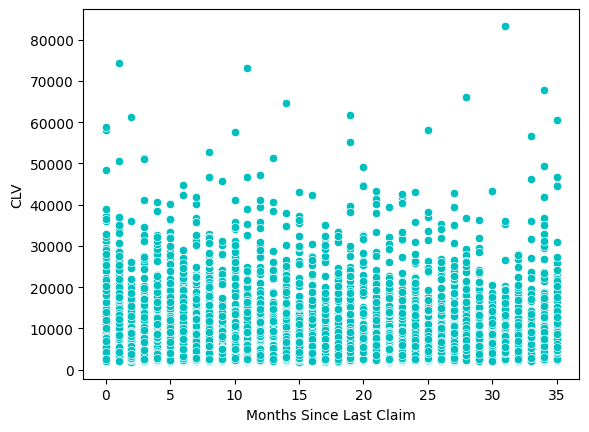

In [129]:
sns.scatterplot(x = data["Months Since Last Claim"],y = data["CLV"],color='c')
plt.show()

# Months Since Policy Inception

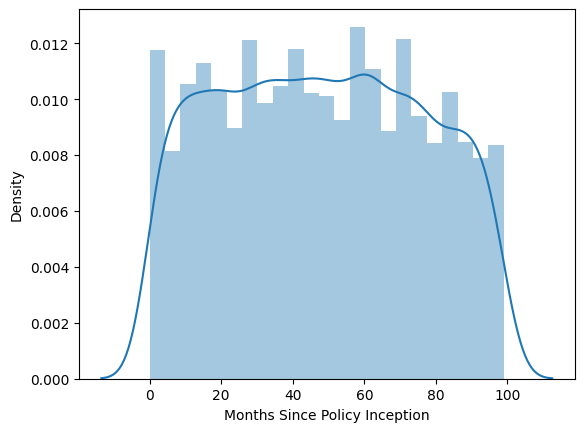

In [130]:
sns.distplot(data['Months Since Policy Inception'])
plt.show()

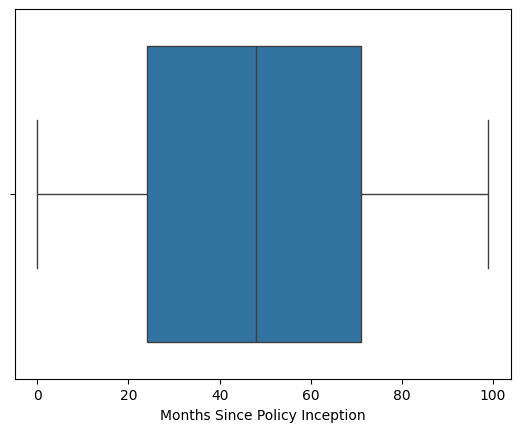

In [131]:
sns.boxplot(x = data["Months Since Policy Inception"])
plt.show()

# Total claim amount

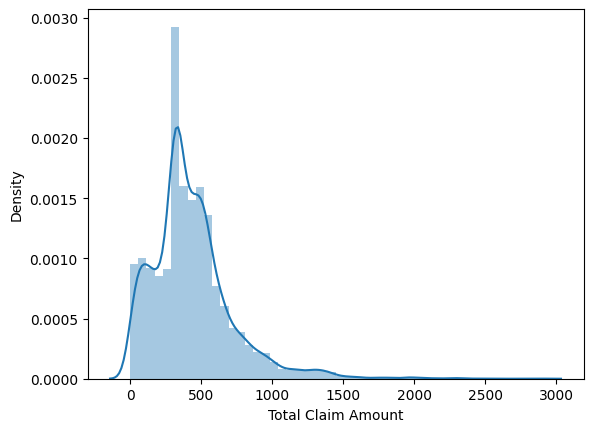

In [132]:
sns.distplot(data['Total Claim Amount'])
plt.show()

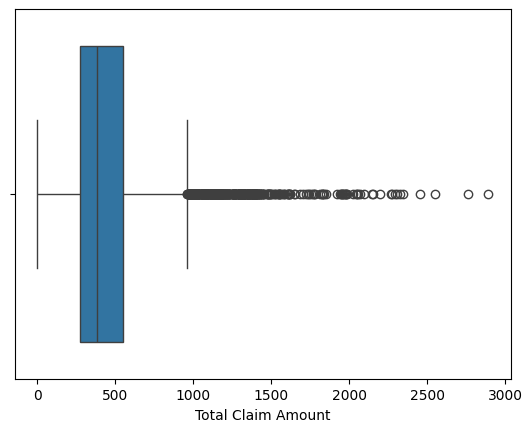

In [133]:
sns.boxplot(x = data["Total Claim Amount"])
plt.show()

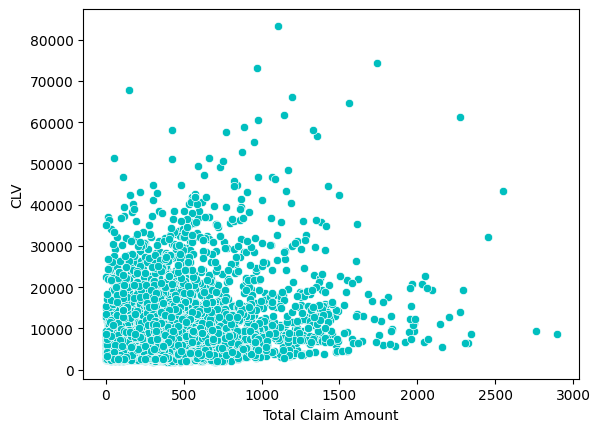

In [134]:
sns.scatterplot(x = data["Total Claim Amount"],y = data["CLV"],color='c')
plt.show()

# The monthly premium auto and income feature has multiple peak's so to remove those peaks we can apply any of the power transformation (SQUARE / CUBE)

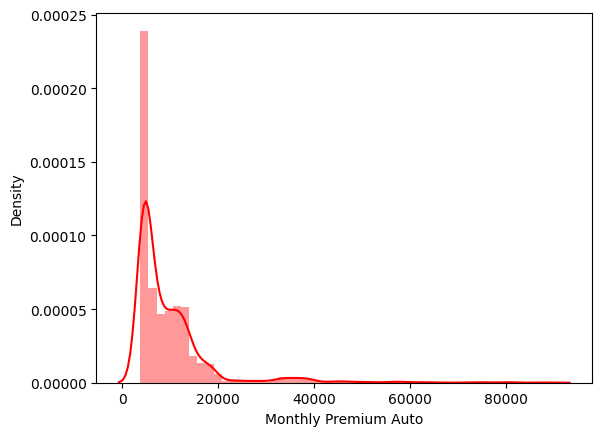

In [135]:
sns.distplot(np.square(data["Monthly Premium Auto"]),color='r')
plt.show()

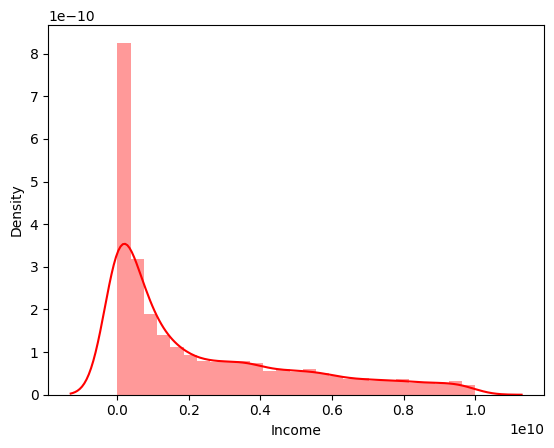

In [136]:
sns.distplot(np.square(data["Income"]),color='r')
plt.show()

# But as we can see that after the square transformation the data is getting heavily skewed, so we stick with the actual distribution again. We will just stick with the actual distribution of the feature in our model building.

# Categorical variables

In [137]:
cat_cols = data.select_dtypes(include="object")

In [138]:
no_col = data[["Number of Open Complaints","Number of Policies"]]

In [139]:
cat_cols = pd.concat([cat_cols,no_col],axis=1)

In [140]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [141]:
cat_cols.drop("Effective To Date",axis=1,inplace=True)

In [142]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [143]:
for i in cat_cols:
    print("Unique values in",str(i),"is",data[i].nunique())
    print(data[i].value_counts())
    print("-----------------------------------------")

Unique values in Customer is 9134
Customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: count, Length: 9134, dtype: int64
-----------------------------------------
Unique values in State is 5
State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
-----------------------------------------
Unique values in Response is 2
Response
No     7826
Yes    1308
Name: count, dtype: int64
-----------------------------------------
Unique values in Coverage is 3
Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64
-----------------------------------------
Unique values in Education is 5
Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64
-------------------------------

# Customer column which is the id has unique values for all records so it can be removed for model building as it adds no significance

# State

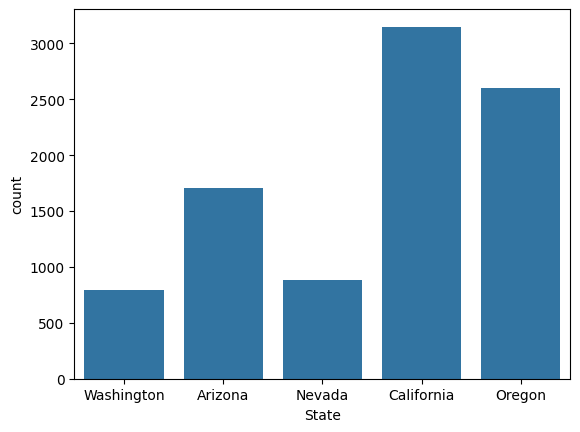

In [144]:
sns.countplot(x = data["State"])
plt.show()

# Most number of people are residing in california

# Response

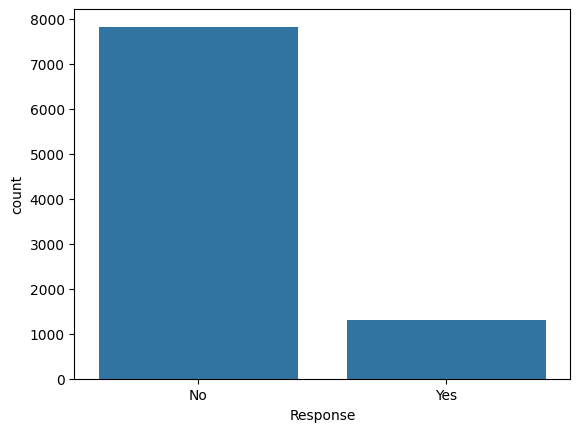

In [145]:
sns.countplot(x = data["Response"])
plt.show()

# Its seems that less than 1400 customers have responded to the marketing calls

# Coverage

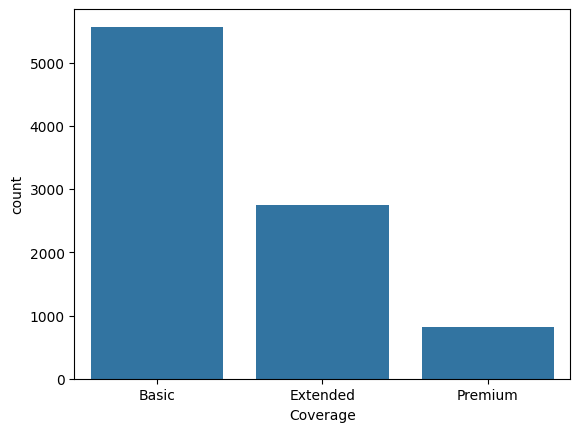

In [146]:
sns.countplot(x = data["Coverage"])
plt.show()

# Education

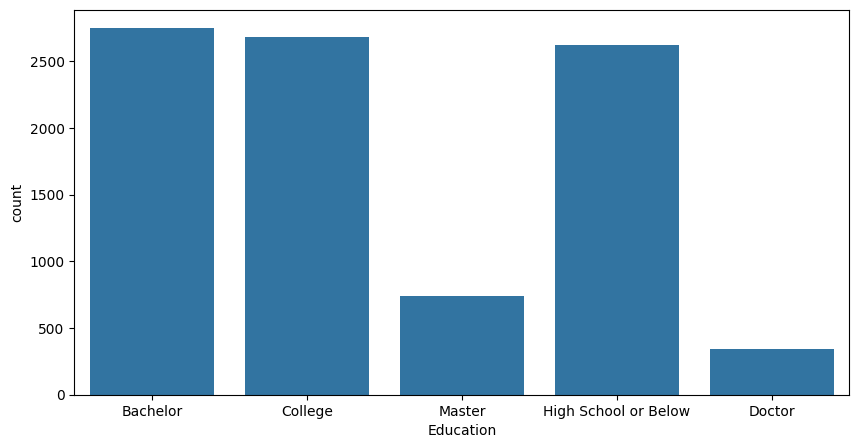

In [147]:
plt.figure(figsize=(10,5))
sns.countplot(x = data["Education"])
plt.show()

# Most of the customers have either a bachelor or college degree

# EmploymentStatus

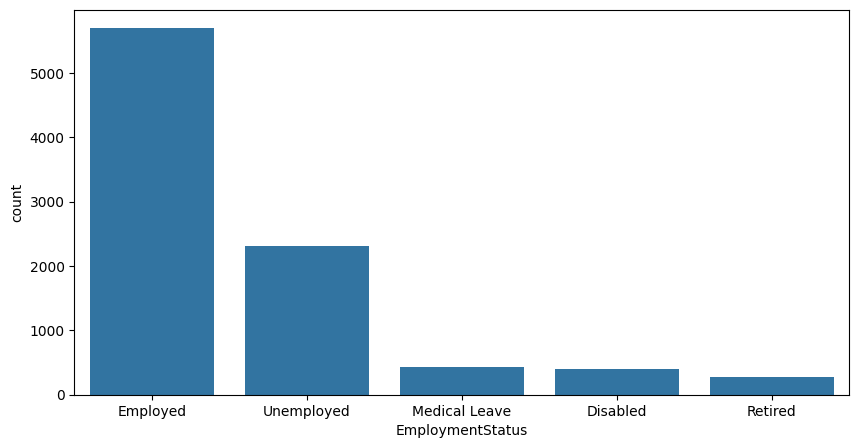

In [151]:
plt.figure(figsize=(10,5))
sns.countplot(x = data["EmploymentStatus"])
plt.show()

In [153]:
data["EmploymentStatus"].value_counts(normalize=True)*100

EmploymentStatus
Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: proportion, dtype: float64

# Around 62.38% of the customers are employed

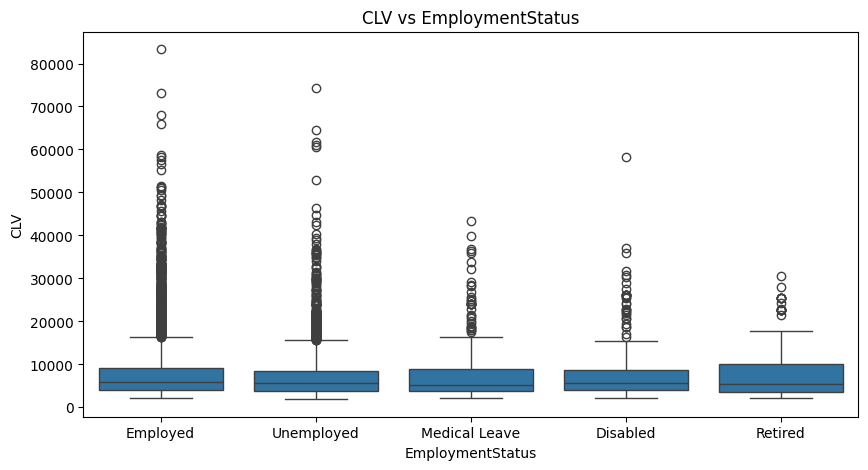

In [154]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['EmploymentStatus'],y=data['CLV'])
plt.title("CLV vs EmploymentStatus")
plt.show()

# Gender

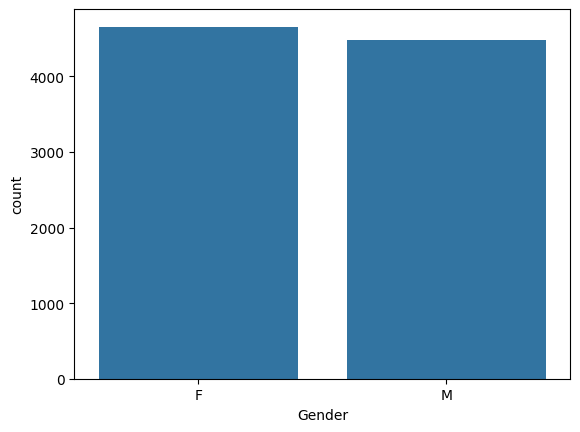

In [156]:
sns.countplot(x = data["Gender"])
plt.show()

# Location Code

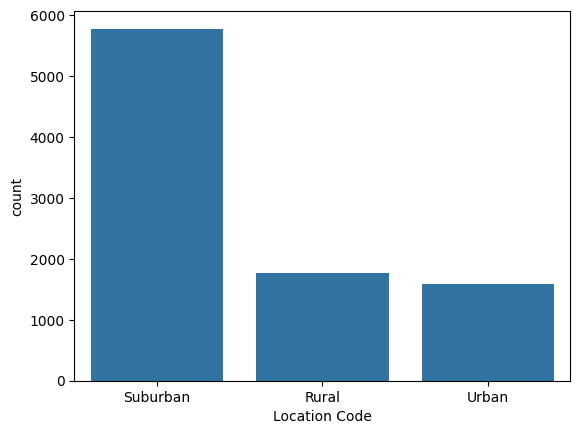

In [158]:
sns.countplot(x = data["Location Code"])
plt.savefig("location.png")
plt.show()

# Marital Status

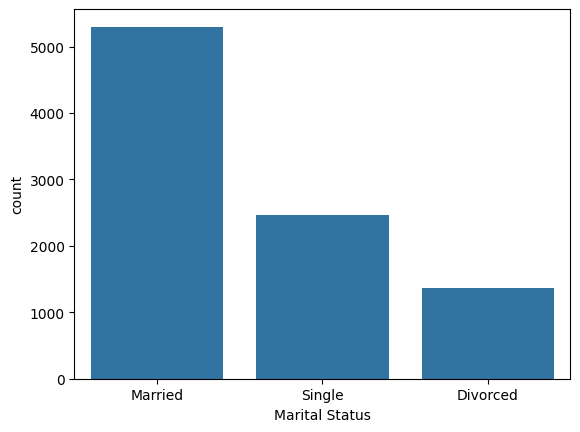

In [160]:
sns.countplot(x = data["Marital Status"])
plt.show()

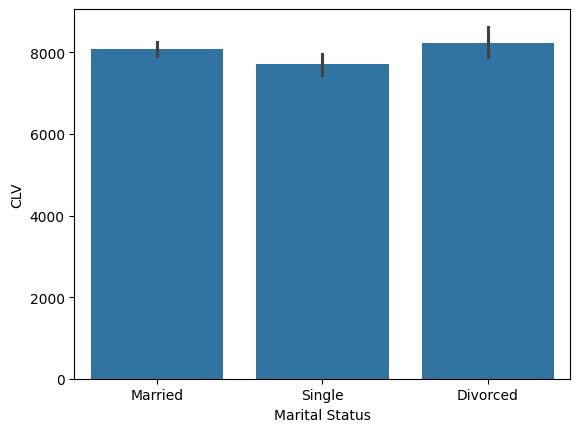

In [163]:
sns.barplot(x = data["Marital Status"],y = data["CLV"])
plt.show()

# Policy Type

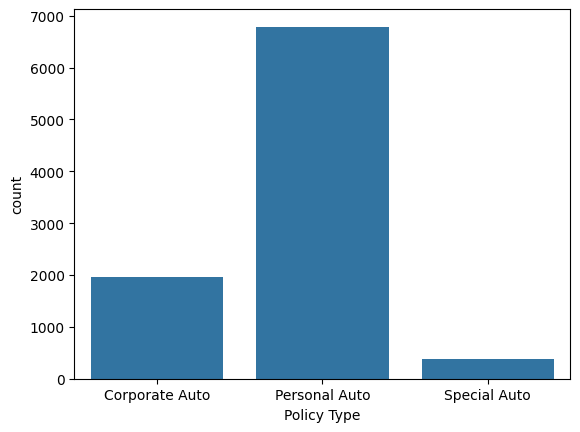

In [165]:
sns.countplot(x = data["Policy Type"])
plt.show()

# Policy

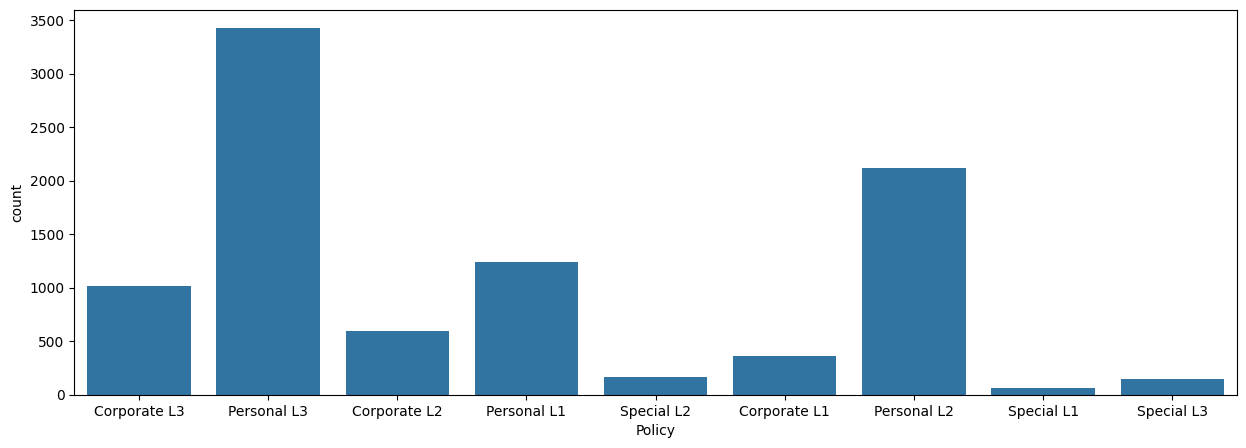

In [166]:
plt.figure(figsize=(15,5))
sns.countplot (x = data["Policy"])
plt.show()

Personal L3 policy subcategory has the most number of customers

# Renew Offer Type

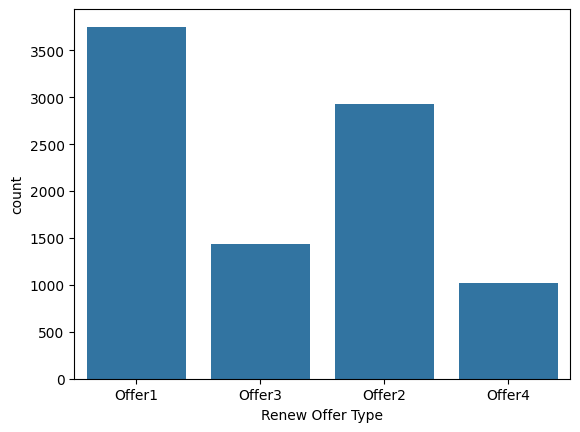

In [167]:
sns.countplot(x = data["Renew Offer Type"])
plt.show()

# Sales Channel

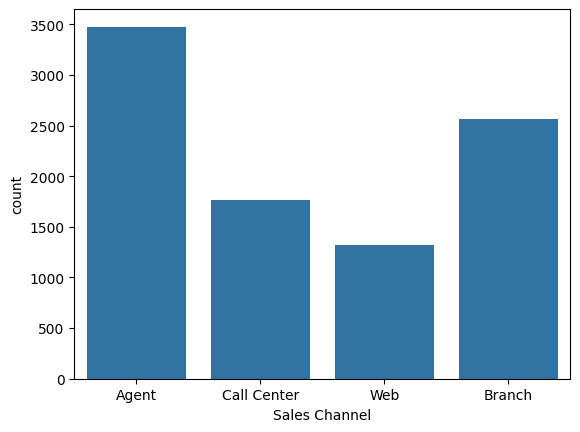

In [168]:
sns.countplot(x = data["Sales Channel"])
plt.show()

# Vehicle Class

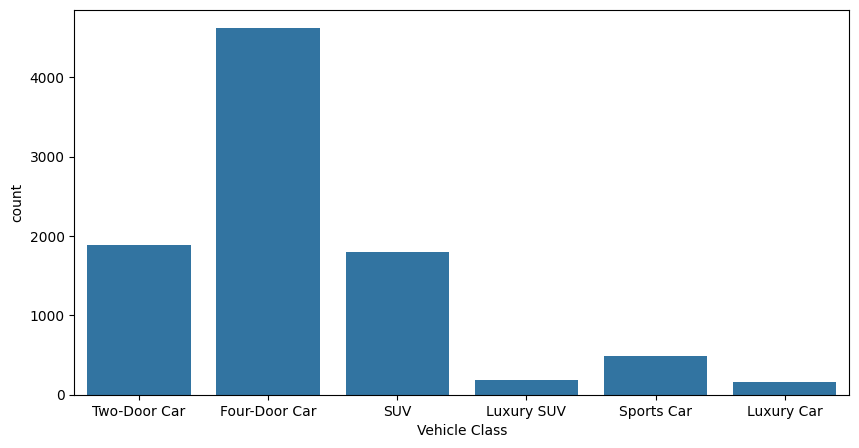

In [169]:
plt.figure(figsize=(10,5))
sns.countplot(x = data["Vehicle Class"])
plt.show()

#  Vehicle Size

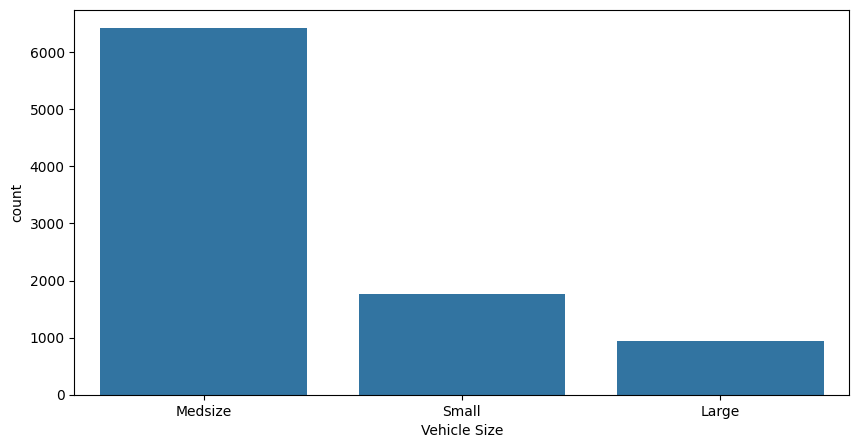

In [170]:
plt.figure(figsize=(10,5))
sns.countplot(x = data["Vehicle Size"])
plt.show()

# Number of Open Complaints

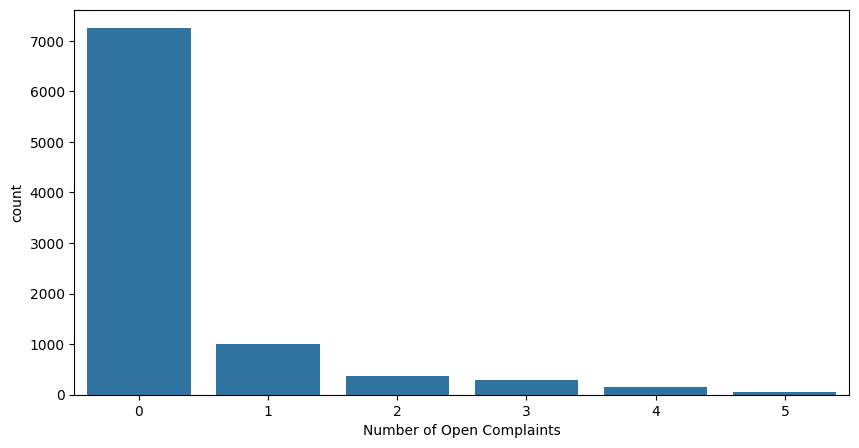

In [171]:
plt.figure(figsize=(10,5))
sns.countplot(x = data["Number of Open Complaints"])
plt.show()

# Number of Policies

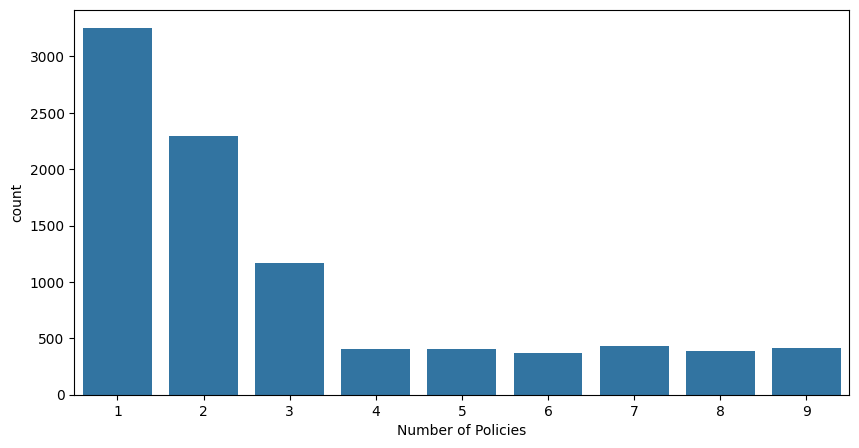

In [172]:
plt.figure(figsize=(10,5))
sns.countplot(x = data["Number of Policies"])
plt.show()

In [173]:
data['Effective To Date']=pd.to_datetime(data['Effective To Date'],infer_datetime_format=True)

In [175]:
data['Months'] = data['Effective To Date'].dt.month

In [177]:
data['Months'] = data['Months'].astype('object')

# Months

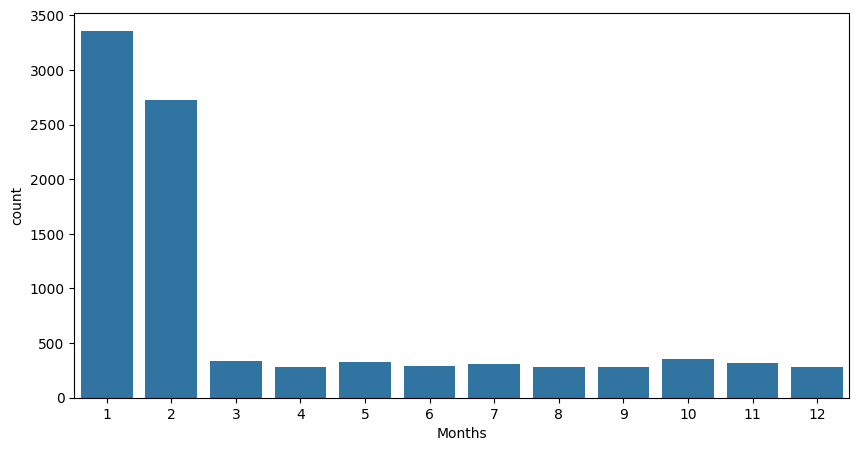

In [180]:
plt.figure(figsize=(10,5))
sns.countplot(x = data["Months"])
plt.show()

In [181]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [182]:
data.columns

Index(['Customer', 'State', 'CLV', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months'],
      dtype='object')

In [184]:
# Convert to sets to get unique column names
cat_cols_set = set(cat_cols.columns)
data_cols_set = set(data.columns)

# Find uncommon columns
uncommon_columns = cat_cols_set.symmetric_difference(data_cols_set)

# Print or use uncommon columns
print("Uncommon columns between cat_cols and data:")
print(uncommon_columns)

Uncommon columns between cat_cols and data:
{'Months Since Policy Inception', 'Months', 'Income', 'Effective To Date', 'Total Claim Amount', 'Monthly Premium Auto', 'CLV', 'Months Since Last Claim'}


# HeatMap

In [183]:
heatmap = data[['CLV', 'Income', 'Monthly Premium Auto','Total Claim Amount']]

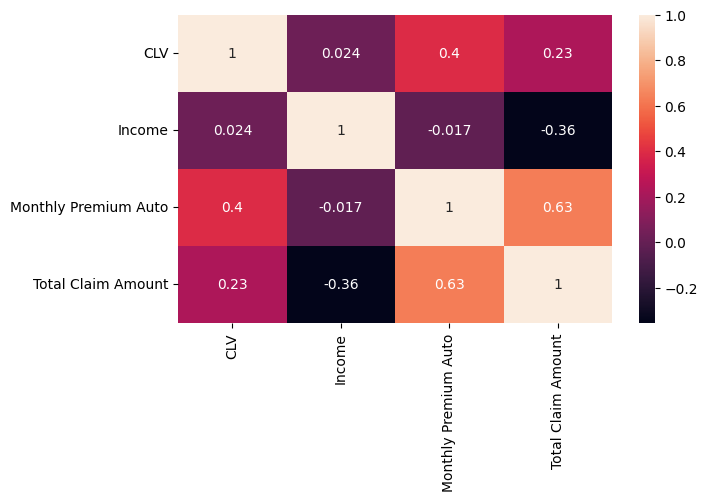

In [185]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
# plt.savefig("Heatmap.png")
plt.show()

# We can clearly see in the heatmap, that customer lifetime value has a better correlation with monthly premium auto and acceptable correlation with total claim amount.

# Statistical Significance

In [186]:
stats.shapiro(data['CLV'])

ShapiroResult(statistic=np.float64(0.7033723183514179), pvalue=np.float64(4.0169007188037684e-83))

# p-value less than 0.05 we reject null hypothesis the data is not normally distributed


# We will proceed with non parametric tests since the dependent variable is not normally distributed

In [187]:
columns_cat = list(cat_cols.columns)
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [189]:
manwhiteneyy = []
anova = []

for i in columns_cat:
    if (data[i].nunique()>2):
        anova.append(i)
    else:
        manwhiteneyy.append(i)
print("Anova:",anova)
print("TTest:",manwhiteneyy)

Anova: ['Customer', 'State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints', 'Number of Policies']
TTest: ['Response', 'Gender']


In [190]:
yes=data[data['Response']=='No']['CLV']
no=data[data['Response']=='Yes']['CLV']

<Axes: xlabel='CLV', ylabel='Density'>

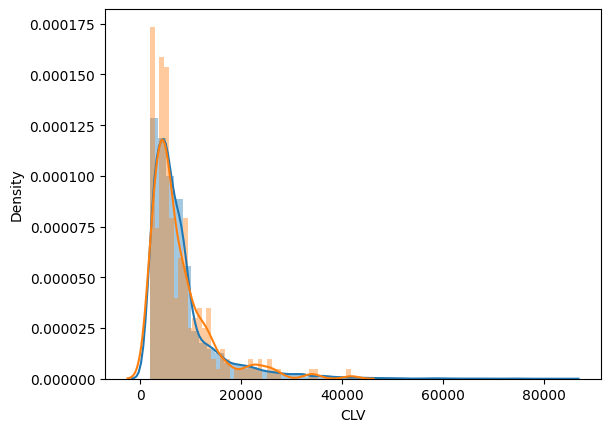

In [191]:
sns.distplot(yes)
sns.distplot(no)

If the distributions are identical, which is the null hypothesis of the Mann-Whitney U test, the mean rank will be the same

In [242]:
f = stats.mannwhitneyu(yes,no)
print(f)

MannwhitneyuResult(statistic=np.float64(5175420.0), pvalue=np.float64(0.5168872245291198))


p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.

In [192]:
male=data[data['Gender']=='M']['CLV']
female=data[data['Gender']=='F']['CLV']

In [193]:
b =stats.mannwhitneyu(male,female)
print(b)

MannwhitneyuResult(statistic=np.float64(10337134.0), pvalue=np.float64(0.48749303056449833))


p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.

we test above two features with non-Paramteric unpaired ttest and we concluded that those 2 features is not significant to predict traget

In [196]:
ca=data[data['State']=='California']['CLV']
Or=data[data['State']=='Oregon']['CLV']
Ar=data[data['State']=='Arizona']['CLV']
Ne=data[data['State']=='Nevada']['CLV']
Wa=data[data['State']=='Washington']['CLV']

In [197]:
a = stats.kruskal(ca,Or,Ar,Ne,Wa)
print(a)

KruskalResult(statistic=np.float64(5.072069583836472), pvalue=np.float64(0.2799823235881896))


p-value > 0.05 failed to reject H0

In [198]:
stats.f_oneway(ca,Or,Ar,Ne,Wa)
print(b)

MannwhitneyuResult(statistic=np.float64(10337134.0), pvalue=np.float64(0.48749303056449833))


In [201]:
Ba=data[data['Coverage']=='Basic']['CLV']
Ex=data[data['Coverage']=='Extended']['CLV']
Pr=data[data['Coverage']=='Premium']['CLV']

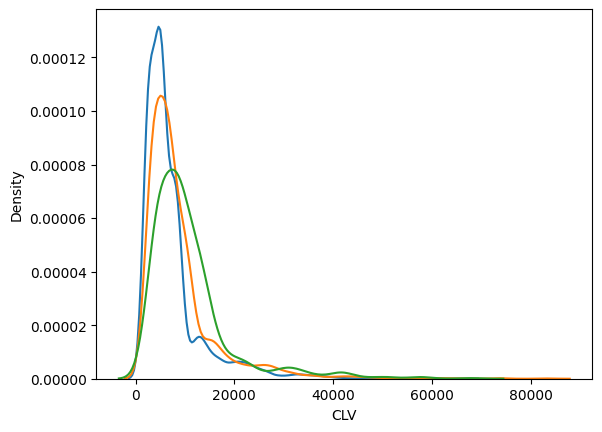

In [202]:
sns.distplot(Ba,hist=False,label='Basic')
sns.distplot(Ex,hist=False)
sns.distplot(Pr,hist=False)
plt.show()

In [203]:
c =stats.kruskal(Ba,Ex,Pr)
print(c)

KruskalResult(statistic=np.float64(502.4996090762843), pvalue=np.float64(7.648852917746348e-110))


In [204]:
stats.f_oneway(Ba,Ex,Pr)

F_onewayResult(statistic=np.float64(133.67511419504905), pvalue=np.float64(6.0158970099807e-58))

In [205]:
Ba=data[data['Education']=='Bachelor']['CLV']
Co=data[data['Education']=='College']['CLV']
Hi=data[data['Education']=='High School or Below']['CLV']
Ma=data[data['Education']=='Master']['CLV']
Da=data[data['Education']=='Doctor']['CLV']

In [206]:
d= stats.kruskal(Ba,Co,Hi,Ma,Da)
print(d)

KruskalResult(statistic=np.float64(12.234061758188824), pvalue=np.float64(0.015693004298603028))


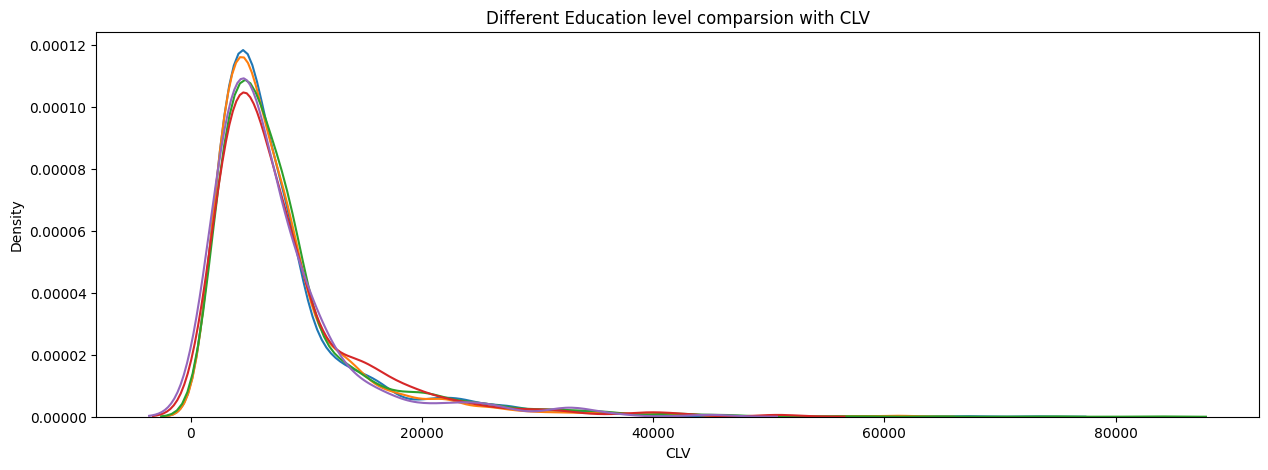

In [207]:
plt.figure(figsize=(15,5))
sns.distplot(Ba,hist=False,label='Bachelor')
sns.distplot(Co,hist=False,label='College')
sns.distplot(Hi,hist=False,label='High School or Below')
sns.distplot(Ma,hist=False,label='Master')
sns.distplot(Da,hist=False,label='Doctor')
plt.title("Different Education level comparsion with CLV")
# plt.savefig("Education.png")
plt.show()

p-value < 0.05 reject H0, Education is significant in predicting CLV

In [208]:
Ba=data[data['EmploymentStatus']=='Employed']['CLV']
Co=data[data['EmploymentStatus']=='Unemployed']['CLV']
Hi=data[data['EmploymentStatus']=='Medical Leave']['CLV']
Ma=data[data['EmploymentStatus']=='Disabled']['CLV']
Da=data[data['EmploymentStatus']=='Retired']['CLV']

In [209]:
e = stats.kruskal(Ba,Co,Hi,Ma,Da)
print(e)

KruskalResult(statistic=np.float64(42.56159302970864), pvalue=np.float64(1.2758458797542519e-08))


p-value < 0.05 reject H0, EmploymentStatus is significant in predicting CLV

In [211]:
Ba=data[data['Location Code']=='Suburban']['CLV']
Co=data[data['Location Code']=='Rural']['CLV']
Hi=data[data['Location Code']=='Urban']['CLV']

In [212]:
g = stats.kruskal(Ba,Co,Hi)
print(g)

KruskalResult(statistic=np.float64(2.4638212999332567), pvalue=np.float64(0.2917346420566411))


p-value < 0.05 reject H0, Location Code can be significant in predicting CLV

In [214]:
Ba=data[data['Marital Status']=='Married']['CLV']
Co=data[data['Marital Status']=='Single']['CLV']
Hi=data[data['Marital Status']=='Divorced']['CLV']

In [215]:
h = stats.kruskal(Ba,Co,Hi)
print(h)

KruskalResult(statistic=np.float64(20.895798766808223), pvalue=np.float64(2.9009146434700455e-05))


p-value < 0.05 reject H0, Marital Status can be significant in predicting CLV

In [217]:
Ba=data[data['Number of Open Complaints']==0]['CLV']
Co=data[data['Number of Open Complaints']==1]['CLV']
Hi=data[data['Number of Open Complaints']==2]['CLV']
Ma=data[data['Number of Open Complaints']==3]['CLV']
Da=data[data['Number of Open Complaints']==4]['CLV']
As=data[data['Number of Open Complaints']==5]['CLV']

In [218]:
o = stats.kruskal(Ba,Co,Hi,Ma,Da,As)
print(o)

KruskalResult(statistic=np.float64(29.160617988301833), pvalue=np.float64(2.1564409504417117e-05))


p-value < 0.05 reject H0, Number of Open Complaints can be significant in predicting CLV

In [219]:
Ba=data[data['Number of Policies']==1]['CLV']
Co=data[data['Number of Policies']==2]['CLV']
Hi=data[data['Number of Policies']==3]['CLV']

In [220]:
p = stats.kruskal(Ba,Co,Hi)
print(p)

KruskalResult(statistic=np.float64(5017.7060662040785), pvalue=np.float64(0.0))


p-value < 0.05 reject H0, Number of Policies can be significant in predicting CLV

In [221]:
Ba=data[data['Policy Type']=='Personal Auto']['CLV']
Co=data[data['Policy Type']=='Corporate Auto']['CLV']
Hi=data[data['Policy Type']=='Special Auto']['CLV']

In [222]:
i = stats.kruskal(Ba,Co,Hi)
print(i)

KruskalResult(statistic=np.float64(4.6074986354931795), pvalue=np.float64(0.09988364526941675))


p-value > 0.05 failed to reject H0, Policy Type may not be significant in predicting CLV

In [223]:
Ba=data[data['Policy']=='Personal L3']['CLV']
Co=data[data['Policy']=='Personal L2']['CLV']
Hi=data[data['Policy']=='Personal L1']['CLV']
Ma=data[data['Policy']=='Corporate L3']['CLV']
Da=data[data['Policy']=='Corporate L2']['CLV']
Ca=data[data['Policy']=='Corporate L1']['CLV']
s1=data[data['Policy']=='Special L2']['CLV']
s2=data[data['Policy']=='Special L3']['CLV']
s3=data[data['Policy']=='Special L1']['CLV']

In [224]:
j =stats.kruskal(Ba,Co,Hi,Ma,Da,Ca,s1,s2,s3)
print(j)

KruskalResult(statistic=np.float64(7.944351884462466), pvalue=np.float64(0.4389248352544014))


p-value > 0.05 failed to reject H0, Policy may not be significant in predicting CLV

In [225]:
Ba=data[data['Renew Offer Type']=='Offer1']['CLV']
Co=data[data['Renew Offer Type']=='Offer2']['CLV']
Hi=data[data['Renew Offer Type']=='Offer3']['CLV']
Ma=data[data['Renew Offer Type']=='Offer4']['CLV']

In [226]:
k =stats.kruskal(Ba,Co,Hi,Ma)
print(k)

KruskalResult(statistic=np.float64(168.90219457792458), pvalue=np.float64(2.1961448819126833e-36))


p-value < 0.05 reject H0, Number of Policies can be significant in predicting CLV

In [227]:
Ba=data[data['Sales Channel']=='Agent']['CLV']
Co=data[data['Sales Channel']=='Branch']['CLV']
Hi=data[data['Sales Channel']=='Call Center']['CLV']
Ma=data[data['Sales Channel']=='Web']['CLV']

In [228]:
l = stats.kruskal(Ba,Co,Hi,Ma)
print(l)

KruskalResult(statistic=np.float64(4.491751501229693), pvalue=np.float64(0.21302721572099015))


p-value > 0.05 failed to reject H0, Sales Channel may not be significant in predicting CLV

In [229]:
Ba=data[data['Vehicle Class']=='Four-Door Car']['CLV']
Co=data[data['Vehicle Class']=='Two-Door Car']['CLV']
Hi=data[data['Vehicle Class']=='SUV']['CLV']
Ma=data[data['Vehicle Class']=='Sports Car']['CLV']
Da=data[data['Vehicle Class']=='Luxury SUV']['CLV']
Ca=data[data['Vehicle Class']=='Luxury Car']['CLV']

In [230]:
m = stats.kruskal(Ba,Co,Hi,Ma,Da,Ca)
print(m)

KruskalResult(statistic=np.float64(1310.5494960284416), pvalue=np.float64(3.3096763447179527e-281))


p-value < 0.05 reject H0, Vehicle Class can be significant in predicting CLV

In [231]:
Ba=data[data['Vehicle Size']=='Medsize']['CLV']
Co=data[data['Vehicle Size']=='Small']['CLV']
Hi=data[data['Vehicle Size']=='Large']['CLV']

In [232]:
n =stats.kruskal(Ba,Co,Hi)
print(n)

KruskalResult(statistic=np.float64(9.564995661218877), pvalue=np.float64(0.008375053354460591))


p-value < 0.05 reject H0, Vehicle Class can be significant in predicting CLV

In [233]:
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [234]:
cat_cols.drop("Customer",axis=1,inplace=True)

In [235]:
cat_cols

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,0,2
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,0,1
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,3,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,0,3


In [243]:
p_values = [a[1],b[1],c[1],d[1],e[1],f[1],g[1],h[1],i[1],j[1],k[1],l[1],m[1],n[1],o[1],p[1]]

In [244]:
p_values

[np.float64(0.2799823235881896),
 np.float64(0.48749303056449833),
 np.float64(7.648852917746348e-110),
 np.float64(0.015693004298603028),
 np.float64(1.2758458797542519e-08),
 np.float64(0.5168872245291198),
 np.float64(0.2917346420566411),
 np.float64(2.9009146434700455e-05),
 np.float64(0.09988364526941675),
 np.float64(0.4389248352544014),
 np.float64(2.1961448819126833e-36),
 np.float64(0.21302721572099015),
 np.float64(3.3096763447179527e-281),
 np.float64(0.008375053354460591),
 np.float64(2.1564409504417117e-05),
 np.float64(0.0)]

In [245]:
len(p_values)

16

In [246]:
len(cat_cols.columns)

16

In [247]:
pd.DataFrame(p_values,index=(cat_cols.columns),columns=['P_Value'])

,P_Value
State,2.799823e-01
Response,4.874930e-01
Coverage,7.648853e-110
Education,1.569300e-02
EmploymentStatus,1.275846e-08
Gender,5.168872e-01
Location Code,2.917346e-01
Marital Status,2.900915e-05
Policy Type,9.988365e-02
Policy,4.389248e-01


Coverage,Education,EmploymentStatus,Marital Status, Renew Offer Type, Vehicle class, Vehicle class, Number of open complaints and No of Policies play a significant role in predicting the CLV

In [248]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [250]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


# Data Preprocessing

In [255]:
catg=pd.get_dummies(cat_cols,drop_first=True)

In [254]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [268]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [269]:
dfn = pd.concat([numerical_cols,catg],axis=1)
dfn.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,0,1,False,False,...,False,False,False,False,False,False,False,True,True,False
1,6979.535903,0,94,13,42,1131.464935,0,8,False,False,...,False,False,False,False,False,False,False,False,True,False
2,12887.431650,48767,108,18,38,566.472247,0,2,False,True,...,False,False,False,False,False,False,False,True,True,False
3,7645.861827,0,106,18,65,529.881344,0,7,True,False,...,False,True,False,False,False,True,False,False,True,False
4,2813.692575,43836,73,12,44,138.130879,0,1,False,False,...,False,False,False,False,False,False,False,False,True,False


# OLS Model

In [270]:
dfn.rename(columns={'CLV':'CLV'},inplace=True)

In [279]:
catg['CLV'] = pd.to_numeric(dfn['CLV'], errors='coerce')  # Convert CLV to numeric

In [271]:
X=dfn.drop(['CLV'],axis=1)
y=dfn['CLV']

In [280]:
# Example of converting all columns in X_constant to numeric and handling missing values
X = dfn.drop(['CLV'], axis=1).apply(pd.to_numeric, errors='coerce').fillna(0)
y = dfn['CLV'].apply(pd.to_numeric, errors='coerce').fillna(0)

In [281]:
X_constant = sm.add_constant(X)


In [284]:
lin_reg = sm.OLS(y, X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     38.60
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          6.92e-323
Time:                        02:19:21   Log-Likelihood:                -92812.
No. Observations:                9134   AIC:                         1.857e+05
Df Residuals:                    9085   BIC:                         1.861e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1486.6386    903.661      1.645      0.100    -284.740    3258.017
Income                            -0.0012      0.004     -0.307      0.759      -0.009       0.006
Monthly Premium Auto              69.5779     10.026      6.940      0.000      49.926      89.230
Months Since Last Claim            7.0626      6.554      1.078      0.281      -5.785      19.911
Months Since Policy Inception     -1.3200      2.380     -0.555      0.579      -5.985       3.345
Total Claim Amount                -0.2268      0.474     -0.478      0.632      -1.156       0.703
Number of Open Complaints       -264.2647     72.496     -3.645      0.000    -406.373    -122.157
Number of Policies                57.7126     27.753      2.080      0.038       3.311     112.114
State_California                  39.9647    189.426      0.211      0.833    -331.354     411.283
State_Nevada                      45.7021    261.160      0.175      0.861    -466.231     557.635
State_Oregon                      84.9912    196.050      0.434      0.665    -299.312     469.294
State_Washington                 164.3324    269.980      0.609      0.543    -364.888     693.553
Response_Yes                    -215.9162    207.436     -1.041      0.298    -622.538     190.705
Coverage_Extended                130.1678    249.287      0.522      0.602    -358.490     618.826
Coverage_Premium                  61.7491    527.605      0.117      0.907    -972.476    1095.974
Education_College                 -1.5962    171.219     -0.009      0.993    -337.225     334.032
Education_Doctor                -197.9744    362.976     -0.545      0.585    -909.488     513.540
Education_High School or Below   388.9735    173.415      2.243      0.025      49.041     728.906
Education_Master                 157.9503    262.899      0.601      0.548    -357.390     673.291
EmploymentStatus_Employed        700.4418    354.477      1.976      0.048       5.587    1395.296
EmploymentStatus_Medical Leave   210.8226    436.143      0.483      0.629    -644.116    1065.761
EmploymentStatus_Retired          64.6393    502.732      0.129      0.898    -920.829    1050.108
EmploymentStatus_Unemployed        9.1563    357.613      0.026      0.980    -691.846     710.158
Gender_M                        -143.5239    132.973     -1.079      0.280    -404.181     117.133
Location Code_Suburban           -73.7895    263.381     -0.280      0.779    -590.076     442.497
Location Code_Urban              128.8756    241.416      0.534      0.593    -344.355     602.106
Marital Status_Married          -177.6388    194.800     -0.912      0.362    -559.490     204.212
Marital Status_Single           -490.7108    225.714     -2.174      0.030    -933.161     -48.260
Policy Type_Pe

Assumptions

1. No autocorrelation
2. Linearity of residuals
3. Normality of error terms
4. No Heteroscedacity
5. No strong MultiCollinearity


Assumption 1 No Auto correlation.

Test needed : Durbin- Watson Test.
    
It's value ranges from 0-4. If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation. If the value ranges from 2-4, it is known as Negative autocorrelation. If the value is exactly 2, it means No Autocorrelation. For a good linear model, it should have low or no autocorrelation. we can see here the values of dublin watson test: 1.995 (No AUTO-CORRELATION)
From the graph below, we can easily see that there is no autocorrelation

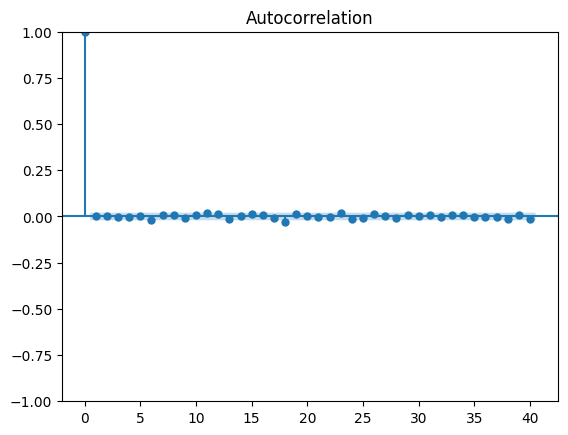

In [287]:
acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)#auto_correlation value, lags= previous value
acf.show()

Assumption 2- Normality of Residuals 2) The second assumption is the Normality of Residuals / Error terms.

For this we prefer the Jarque Bera test. For a good model, the residuals should be normally distributed. The higher the value of Jarque Bera test , the lesser the residuals are normally distributed. We generally prefer a lower value of jarque bera test.

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. A large value for the jarque-bera test indicates non normality.

The jarque bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution. Note that this test generally works good for large enough number of data samples(>2000) as the test statistics asymptotically has a chi squared distribution with degrees 2 of freedom.

In [289]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

SignificanceResult(statistic=np.float64(65051.54524138252), pvalue=np.float64(0.0))


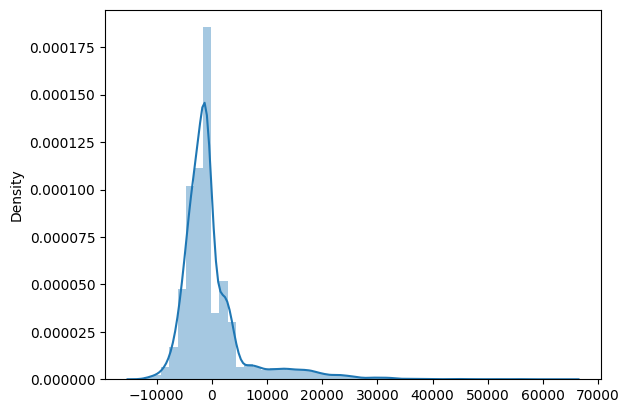

In [290]:
sns.distplot(lin_reg.resid)
plt.show()

From the graph we infer that due to the high value of Jarque Bera test, only few residuals are normally distributed


Asssumption 3 

- Linearity of residuals

Here we have 2 options. Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals. OR We can go for rainbow test. Let's look both of them one by one.

In [291]:
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)#the fraction of the data to include in the center model

(np.float64(1.016497272996893), np.float64(0.29071287436871457))

H0:The data is linear, pvalue > 0.05 failed to reject H0, here we failed to reject H0 so residuals are normally distributed

In [292]:
lin_reg.resid.mean()

np.float64(1.665896372896121e-09)

Assumption 4 - 
Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test) Homoscedacity :: If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.
        
Heteroscedacity :: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetricalshape.
This test is based on the hytpothesis testing where null and alternate hypothesis are: 𝐻0:𝜎𝑢𝑖 𝑖𝑠 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎 𝐻𝑎:𝜎𝑢𝑖 𝑖𝑠 𝑛𝑜𝑡 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎 The residuals should be homoscedastic.

Goldfeld Test

In [295]:
import statsmodels.stats.api as sms
name=['F-statistic','p-value']
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

test

(np.float64(1.2289680194898227),
 np.float64(2.216740369946362e-12),
 'increasing')

p-value below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity.

Assumption 5- NO MULTI COLLINEARITY


The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

In [298]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
Income,3.183923
Monthly Premium Auto,27.569851
Months Since Last Claim,1.009934
Months Since Policy Inception,1.022048
Total Claim Amount,4.396905
Number of Open Complaints,1.009196
Number of Policies,1.019460
State_California,1.878492
State_Nevada,1.378696
State_Oregon,1.813907


we can see that there is high VIF in column Policy & policy type Also we have seen in statistical approach these veriables are not significant to predict target hence from above 2 conclusion we can remove them

In [306]:
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)


y=dfn['CLV']          
y =np.log(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)




In [307]:
numerical_cols.rename(columns={'CLV':'CLV'},inplace=True)

In [308]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6393, 42)
(6393,)
(2741, 42)
(2741,)


# Model Building
Linear Regression

In [310]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.26073373730563176
R^2 score for test: 0.25484160264997946


In [313]:
y_pred = model.predict(X_test)

In [319]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.577231415348726
MAE 0.4455033282270872
R-squared: 0.25484160264997946


In [320]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    Xc = sm.add_constant(X)
    model = sm.OLS(y,Xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['Monthly Premium Auto', 'Number of Open Complaints', 'Number of Policies', 'Coverage_Extended', 'Coverage_Premium', 'Education_High School or Below', 'EmploymentStatus_Employed', 'Marital Status_Single', 'Policy_Corporate L2', 'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3', 'Renew Offer Type_Offer4', 'Vehicle Class_SUV', 'Vehicle Class_Sports Car']


In [321]:
X_new = X[['Monthly Premium Auto', 'Number of Open Complaints', 'Number of Policies', 'Coverage_Extended', 'Coverage_Premium', 'Education_High School or Below', 'EmploymentStatus_Employed', 'Marital Status_Single', 'Policy_Corporate L2', 'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3', 'Renew Offer Type_Offer4', 'Vehicle Class_SUV', 'Vehicle Class_Sports Car']]

In [322]:
X_constant_new=sm.add_constant(X_new)
lin_reg=sm.OLS(y,X_constant_new).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     228.2
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        02:43:17   Log-Likelihood:                -7694.3
No. Observations:                9134   AIC:                         1.542e+04
Df Residuals:                    9119   BIC:                         1.553e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              7.9001      0.024    333.289      0.000       7.854       7.947
Monthly Premium Auto               0.0070      0.000     30.864      0.000       0.007       0.007
Number of Open Complaints         -0.0317      0.006     -4.895      0.000      -0.044      -0.019
Number of Policies                 0.0529      0.002     21.385      0.000       0.048       0.058
Coverage_Extended                  0.0669      0.014      4.773      0.000       0.039       0.094
Coverage_Premium                   0.0898      0.024      3.729      0.000       0.043       0.137
Education_High School or Below     0.0336      0.013      2.567      0.010       0.008       0.059
EmploymentStatus_Employed          0.0922      0.013      7.093      0.000       0.067       0.118
Marital Status_Single             -0.0506      0.014     -3.622      0.000      -0.078      -0.023
Policy_Corporate L2               -0.0548      0.024     -2.295      0.022      -0.102      -0.008
Renew Offer Type_Offer2           -0.1199      0.014     -8.370      0.000      -0.148      -0.092
Renew Offer Type_Offer3           -0.0602      0.018     -3.416      0.001      -0.095      -0.026
Renew Offer Type_Offer4           -0.1327      0.020     -6.541      0.000      -0.172      -0.093
Vehicle Class_SUV                  0.1502      0.017      8.777      0.000       0.117       0.184
Vehicle Class_Sports Car           0.1510      0.028      5.429      0.000       0.096       0.205
==============================================================================
Omnibus:                     1476.101   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2293.969
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       3.788   Cond. No.                         516.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Rigde and Lasso Regression

In [327]:
ridge = Ridge(alpha=0.1)

ridge.fit(X_train, y_train)
print('Ridge Regression')


y_pred = ridge.predict(X_test)

# Calculate metrics
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Ridge Regression
RMSE: 0.5772298681232935
R-squared: 0.25484559732680356


In [330]:
ridge = Ridge(alpha=1.0) 


ridge.fit(X_train, y_train)

print('Ridge Regression')

y_pred = ridge.predict(X_test)


print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Ridge Regression
RMSE: 0.5772172981328677
R-squared: 0.25487805053908263


In [331]:
lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('Ridge Regression')
y_pred = lasso.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Ridge Regression
RMSE: 0.5992937645386807
R-squared: 0.196791677778546


# Decision Tree

In [333]:
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.2610955075278434
MAE 0.10299746385972029
R-squared: 0.8475429611700678


In [336]:
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=np.log(dfn['CLV'])         
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

# RandomForest

In [338]:
rf = RandomForestRegressor(random_state=1)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.19661749569035988
MAE 0.08901323881015138
R-squared: 0.9135444253055963


# Hyperparameter tuning of random forest

In [360]:
rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],
        
        'n_estimators' : [100,200,50],
        
        "bootstrap" : [True, False],
    
        'max_features': ['auto', 'sqrt', 'log2']
        
        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)
grid.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [364]:
rf = RandomForestRegressor(**best_rf_params)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Regressor:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('R-squared:', r2_score(y_test, y_pred_rf))


Random Forest Regressor:
RMSE: 0.22648406718081635
MAE: 0.11767206477647424
R-squared: 0.885284000739191


In [370]:
# Initialize AdaBoostRegressor with DecisionTreeRegressor as base estimator
adaboost = AdaBoostRegressor(n_estimators=150, random_state=42)
adaboost.base_estimator_ = RandomForestRegressor(**best_rf_params)


In [372]:
adaboost.fit(X_train, y_train)

# Evaluate AdaBoostRegressor
y_pred_adaboost = adaboost.predict(X_test)
print('\nAdaBoost Regressor with RandomForest base:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_adaboost)))
print('MAE:', mean_absolute_error(y_test, y_pred_adaboost))
print('R-squared:', r2_score(y_test, y_pred_adaboost))


AdaBoost Regressor with RandomForest base:
RMSE: 0.2933323483948225
MAE: 0.236212580575664
R-squared: 0.8075718520493333


In [377]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False)[:10]

,Score
Number of Policies,0.550184
Monthly Premium Auto,0.125407
Total Claim Amount,0.051575
Months Since Policy Inception,0.027227
Months Since Last Claim,0.025188
Vehicle Class_SUV,0.024498
Income,0.023960
Vehicle Class_Luxury Car,0.015109
Vehicle Class_Luxury SUV,0.014426
Coverage_Premium,0.011141


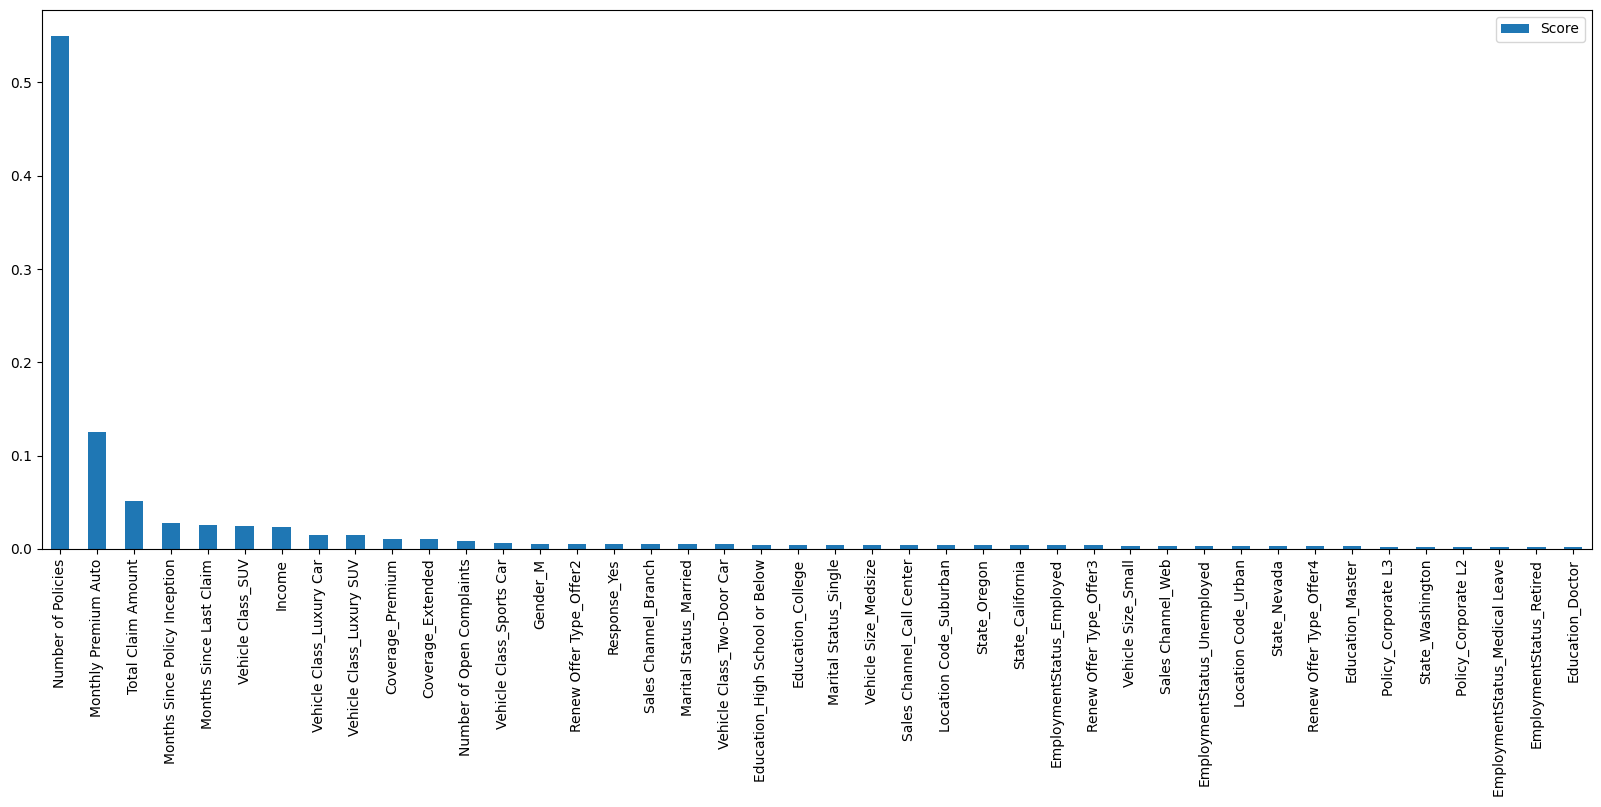

In [378]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()

Random Forest Model with hyperparameter tuning using GridSearchCV gave the best RMSE and R^2 score
No of Policies and Monthly Premium are the most important features in predicting CLV